In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [60]:
df= pd.read_csv('..\dataset\diabetes.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Columns should not contain zeros

In [63]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

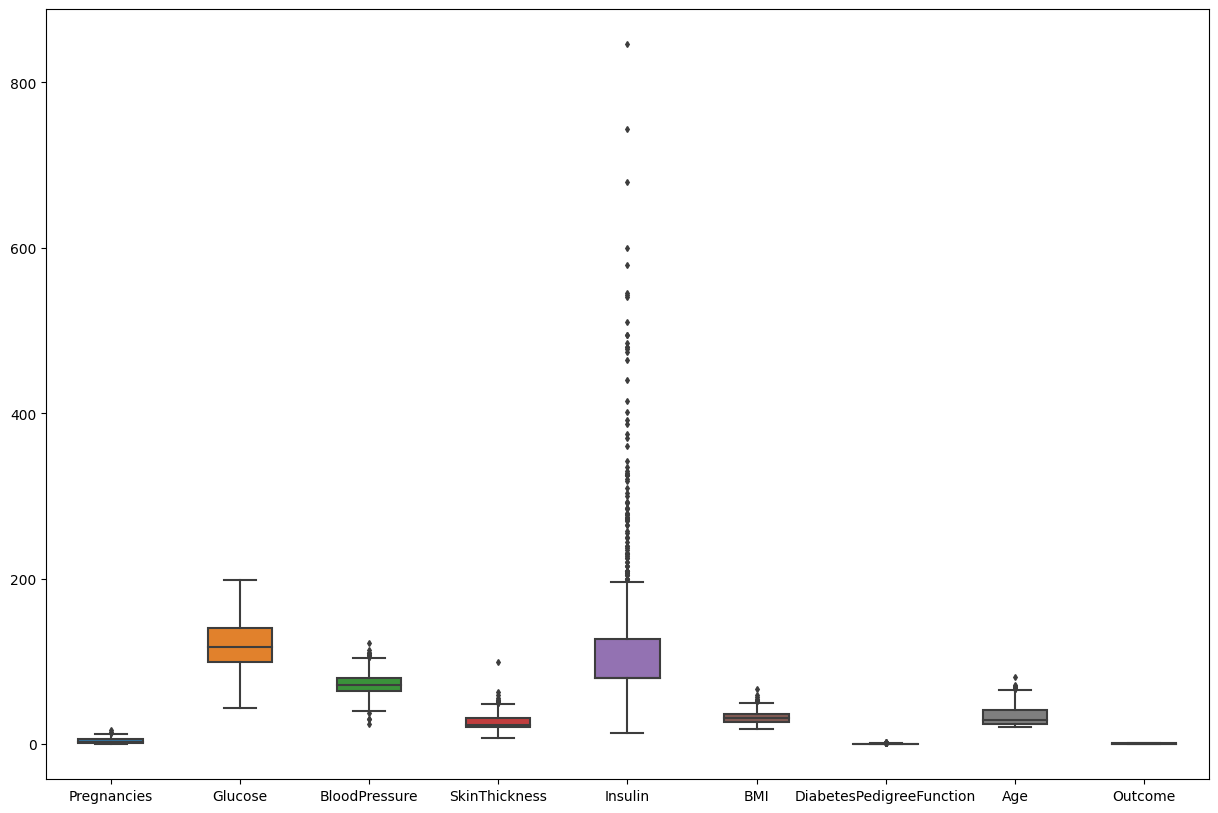

In [66]:
fig, ax = plt.subplots(figsize = (15,10))

sns.boxplot(data=df, width=0.5, ax = ax, fliersize=3)

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

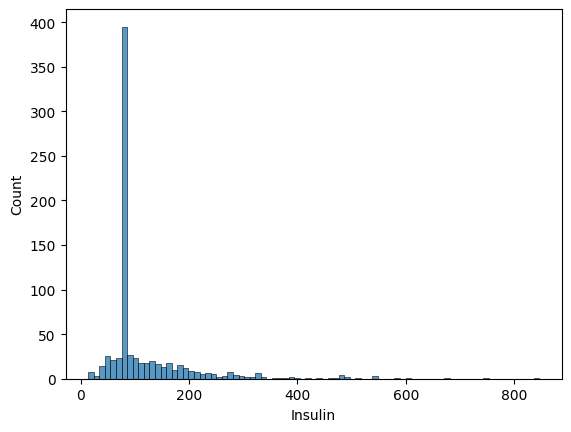

In [67]:
sns.histplot(df['Insulin'])

In [68]:
X = df.iloc[:, :df.shape[1]-1]

In [69]:
Y = df.iloc[:, -1]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [85]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
647,0,179.0,50.0,36.000000,159.000000,37.8,0.455,22
174,2,75.0,64.0,24.000000,55.000000,29.7,0.370,33
456,1,135.0,54.0,20.536458,79.799479,26.7,0.687,62
534,1,77.0,56.0,30.000000,56.000000,33.3,1.251,24
106,1,96.0,122.0,20.536458,79.799479,22.4,0.207,27
...,...,...,...,...,...,...,...,...
568,4,154.0,72.0,29.000000,126.000000,31.3,0.338,37
58,0,146.0,82.0,20.536458,79.799479,40.5,1.781,44
423,2,115.0,64.0,22.000000,79.799479,30.8,0.421,21
157,1,109.0,56.0,21.000000,135.000000,25.2,0.833,23


In [71]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [72]:
import pickle
def scaler_standard(x_train , x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    file = open("..\model\scaler.pkl", "wb")
    pickle.dump(scaler, file)
    file.close()

    return x_train_scaled, x_test_scaled


In [73]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [74]:
log_reg = LogisticRegression()

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters = {
    'penalty' : ['l1','l2', 'elasticnet', None],
    'C' : [1,5,10,15,20],
    'solver' : ['newton-cg', 'lbfgs', 'linlinear']
}

In [77]:
clf = GridSearchCV(
    estimator=log_reg,                  
    param_grid=parameters,
    scoring = 'accuracy',
    cv = 10
)

clf.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'linlinear']},
             scoring='accuracy')

In [78]:
clf.best_params_

{'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}

In [79]:
log_reg = LogisticRegression(penalty='l2', C=20, solver='lbfgs')

In [80]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=20)

In [81]:
y_pred = log_reg.predict(x_test)

In [82]:
acc1 = accuracy_score(y_test, y_pred)

In [83]:
acc1

0.78125

In [84]:
f = open("..\model\logreg.pkl", "wb")
pickle.dump(log_reg, f)